In [93]:
import pandas as pd

df = pd.read_csv('UsArrests.csv')
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [95]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [96]:
df = df.dropna() #drop rows with at least one missing value

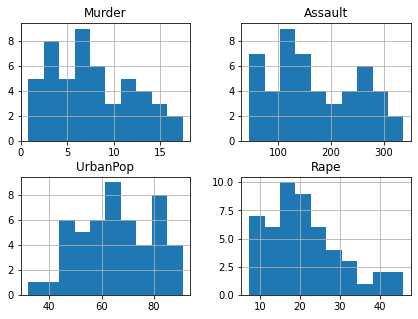

In [97]:
hist = df.hist(figsize=(7, 5))

import matplotlib.pyplot as plt
plt.show()

In [98]:
from sklearn.preprocessing import LabelEncoder

# Converting the categorical variable to numerical values
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df)) #standardise values

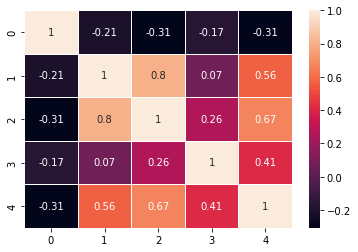

In [100]:
import seaborn as sns

ax = sns.heatmap(df.corr(), linewidth=1, annot=True)
plt.show()

High correlation between variables 1 and 2 i.e murder and assault

In [101]:
from sklearn.decomposition import PCA

x = df.iloc[:,:].values
pca = PCA()
principal_components = pca.fit_transform(x)

In [102]:
pca_df = pd.DataFrame(principal_components, index=df.index)

pca_df.head()

,0,1,2,3,4
0,1.431218,0.707694,1.571809,-0.529016,0.245782
1,2.344861,0.723025,1.394987,1.960770,-0.385881
2,2.156936,-0.991802,0.751082,-0.016037,-0.771617
3,0.297199,0.632516,1.744187,0.021351,-0.095552
4,2.849696,-1.640568,0.179269,0.554437,-0.304284


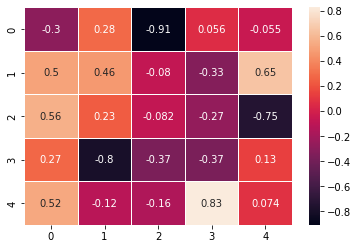

In [103]:
components = pd.DataFrame(pca.components_, columns=df.columns).transpose()
ax = sns.heatmap(components,linewidth=1, annot=True)
plt.show()

In [104]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [0.52751625 0.20100993 0.16624494 0.07097752 0.03425136]


In [105]:
print(abs( pca.components_ ))

[[0.29627163 0.50351939 0.55768182 0.27173422 0.52329995]
 [0.28114842 0.46401739 0.22941525 0.79964093 0.11656099]
 [0.90937582 0.08009669 0.08209132 0.36643548 0.16001936]
 [0.05621653 0.3274691  0.26976001 0.36798071 0.82548375]
 [0.05526314 0.64614595 0.74622395 0.13057618 0.07443837]]


In [106]:
df.head()

,0,1,2,3,4
0,-1.697749,1.255179,0.790787,-0.526195,-0.003451
1,-1.628453,0.513019,1.118060,-1.224067,2.509424
2,-1.559158,0.072361,1.493817,1.009122,1.053466
3,-1.489862,0.234708,0.233212,-1.084492,-0.186794
4,-1.420566,0.281093,1.275635,1.776781,2.088814


1 row for each principal component, 1 column for each variable

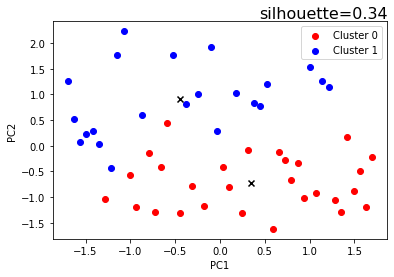

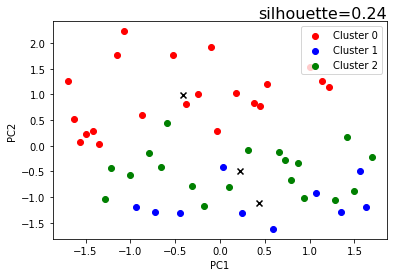

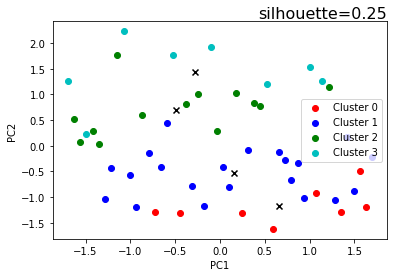

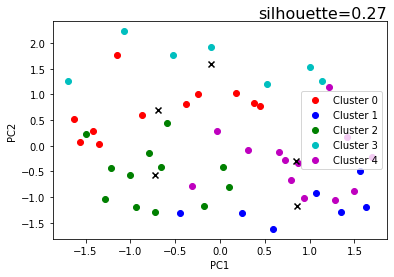

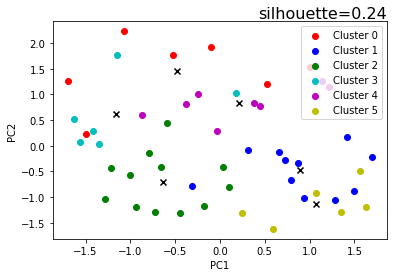

In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score

def scatter_Kmeans(x, k, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')

     
    score = round(silhouette_score(x, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

for k in range(2,7):
  scatter_Kmeans(x, k, r=0)

Best silhouette score when using 2 clusters, and working only with the first 2 principal components

In [108]:
from sklearn.cluster import AgglomerativeClustering

# apply agglomerative clustering with 2 clusters
cluster = AgglomerativeClustering(n_clusters=2, affinity='cityblock', linkage='complete')
cluster_labels = cluster.fit_predict(x)

# compute silhouette score
score = silhouette_score(x, cluster_labels, metric='cityblock')
print(score)

0.3598697637095151


In [109]:
# apply agglomerative clustering with 2 clusters
cluster = AgglomerativeClustering(n_clusters=2, affinity='cityblock', linkage='single')
cluster_labels = cluster.fit_predict(x)

# compute silhouette score
score = silhouette_score(x, cluster_labels, metric='cityblock')
print(score)

0.2094985606382188


Best silhouette score with complete linkage